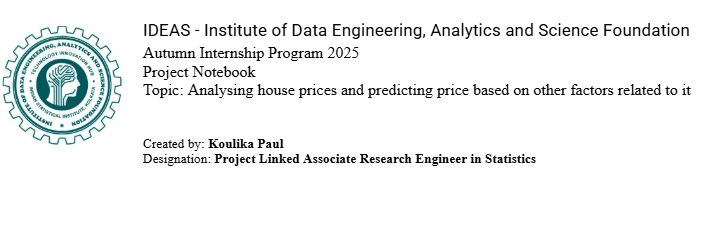

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import warnings
warnings.filterwarnings("ignore")

In [80]:
from google.colab import drive
drive.mount('/content/drive')
house_data= pd.read_csv('/content/drive/MyDrive/house_price_india.csv')
# house_data
# !rm /content/*.csv
# #upload file
# uploaded = files.upload()
# house_data = pd.read_csv(io.BytesIO(uploaded['house_price_india.csv']))
# house_data.head()


Mounted at /content/drive


***Insert synthetic missing value***

In [81]:
house_data_missing= house_data.copy()
## each column missing values are inserted, 20% sample of each column is been drawn and its index is noted to replace those rows with nan
for i in house_data_missing.columns:
  house_data_missing[i].loc[house_data_missing[i].sample(frac=0.2).index]= np.nan
house_data_missing

id     Date  number of bedrooms  number of bathrooms  \
0      6.762810e+09  42491.0                 5.0                 2.50   
1      6.762811e+09      NaN                 4.0                 2.50   
2      6.762811e+09  42491.0                 5.0                 2.75   
3      6.762813e+09  42491.0                 4.0                 2.50   
4               NaN  42491.0                 3.0                  NaN   
...             ...      ...                 ...                  ...   
14615           NaN  42734.0                 2.0                 1.50   
14616  6.762830e+09  42734.0                 3.0                 2.00   
14617  6.762831e+09  42734.0                 2.0                  NaN   
14618  6.762831e+09  42734.0                 4.0                 1.00   
14619  6.762831e+09  42734.0                 3.0                  NaN   

       living area  lot area  number of floors  waterfront present  \
0           3650.0    9050.0               2.0                 0.0   
1           2920.0    4000.0               1.5                 0.0   
2           2910.0    9480.0               1.5                 0.0   
3           3310.0   42998.0               2.0                 NaN   
4           2710.0    4500.0               1.5                 0.0   
...            ...       ...               ...                 ...   
14615       1556.0   20000.0               1.0                 0.0   
14616       1680.0    7000.0               1.5                 0.0   
14617       1070.0       NaN               1.0                 NaN   
14618       1030.0       NaN               1.0                 0.0   
14619        900.0    4770.0               NaN                 0.0   

       number of views  condition of the house  ...  Built Year  \
0                  NaN                     5.0  ...      1921.0   
1                  0.0                     5.0  ...      1909.0   
2                  0.0                     3.0  ...         NaN   
3                  0.0                     3.0  ...      2001.0   
4                  0.0                     NaN  ...         NaN   
...                ...                     ...  ...         ...   
14615              0.0                     4.0  ...      1957.0   
14616              0.0                     4.0  ...         NaN   
14617              0.0                     3.0  ...      1962.0   
14618              0.0                     4.0  ...      1955.0   
14619              0.0                     3.0  ...      1969.0   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                  0.0     122003.0    52.8645   -114.557                NaN   
1                  NaN     122004.0    52.8878   -114.470                NaN   
2                  0.0     122004.0    52.8852   -114.468             2940.0   
3                  0.0     122005.0    52.9532        NaN             3350.0   
4                  0.0     122006.0        NaN   -114.485             2060.0   
...                ...          ...        ...        ...                ...   
14615              0.0     122066.0    52.6191   -114.472             2250.0   
14616              0.0     122072.0    52.5075   -114.393             1540.0   
14617              0.0     122056.0    52.7289   -114.507             1130.0   
14618              0.0     122042.0    52.7157   -114.411             1420.0   
14619              NaN     122018.0    52.5338   -114.552              900.0   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0              5400.0                       2.0                       58.0   
1              4000.0                       2.0                        NaN   
2              6600.0                       1.0                       53.0   
3                 NaN                       3.0                       76.0   
4              4500.0                       1.0                       51.0   
...               ...                       ...                  

**Q1. Try inserting a missing value to a specific column of your choice**

In [82]:
house_data_missing = house_data.copy()
#changing column 'Built Year'
missing_indices = house_data_missing['Built Year'].sample(frac=0.2, random_state=42).index
house_data_missing.loc[missing_indices, 'Built Year'] = np.nan
#check
house_data_missing[['Built Year']].head(15)

Built Year
0       1921.0
1       1909.0
2       1939.0
3       2001.0
4       1929.0
5       1951.0
6       2006.0
7       1923.0
8          NaN
9       1920.0
10      1979.0
11      1945.0
12      1945.0
13      2000.0
14         NaN

***Information about the data***

In [83]:
house_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

***Dropping columns***

In [84]:
## Date column wrong input in the data so we drop it and keep inside the actual data
house_data_missing.drop(['Date','Longitude','Renovation Year','Postal Code', 'Lattitude','living_area_renov', 'lot_area_renov'],axis=1,inplace=True)

In [85]:
house_data_missing.columns

Index(['id', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Number of schools nearby', 'Distance from the airport',
       'Price'],
      dtype='object')

**Q2. Show statistics about the data of only numeric columns**

In [86]:
#summary
house_data_missing.describe()
#transposed
house_data_missing.describe().T

count          mean            std  \
id                                     14620.0  6.762821e+09    6237.574799   
number of bedrooms                     14620.0  3.379343e+00       0.938719   
number of bathrooms                    14620.0  2.129583e+00       0.769934   
living area                            14620.0  2.098263e+03     928.275721   
lot area                               14620.0  1.509328e+04   37919.621304   
number of floors                       14620.0  1.502360e+00       0.540239   
waterfront present                     14620.0  7.660739e-03       0.087193   
number of views                        14620.0  2.331053e-01       0.766259   
condition of the house                 14620.0  3.430506e+00       0.664151   
grade of the house                     14620.0  7.682421e+00       1.175033   
Area of the house(excluding basement)  14620.0  1.801784e+03     833.809963   
Area of the basement                   14620.0  2.964791e+02     448.551409   
Built Year                             11696.0  1.970747e+03      29.648939   
Number of schools nearby               14620.0  2.012244e+00       0.817284   
Distance from the airport              14620.0  6.495096e+01       8.936008   
Price                                  14620.0  5.389322e+05  367532.380804   

                                                min           25%  \
id                                     6.762810e+09  6.762815e+09   
number of bedrooms                     1.000000e+00  3.000000e+00   
number of bathrooms                    5.000000e-01  1.750000e+00   
living area                            3.700000e+02  1.440000e+03   
lot area                               5.200000e+02  5.010750e+03   
number of floors                       1.000000e+00  1.000000e+00   
waterfront present                     0.000000e+00  0.000000e+00   
number of views                        0.000000e+00  0.000000e+00   
condition of the house                 1.000000e+00  3.000000e+00   
grade of the house                     4.000000e+00  7.000000e+00   
Area of the house(excluding basement)  3.700000e+02  1.200000e+03   
Area of the basement                   0.000000e+00  0.000000e+00   
Built Year                             1.900000e+03  1.951000e+03   
Number of schools nearby               1.000000e+00  1.000000e+00   
Distance from the airport              5.000000e+01  5.700000e+01   
Price                                  7.800000e+04  3.200000e+05   

                                                50%           75%  \
id                                     6.762821e+09  6.762826e+09   
number of bedrooms                     3.000000e+00  4.000000e+00   
number of bathrooms                    2.250000e+00  2.500000e+00   
living area                            1.930000e+03  2.570000e+03   
lot area                               7.620000e+03  1.080000e+04   
number of floors                       1.500000e+00  2.000000e+00   
waterfront present                     0.000000e+00  0.000000e+00   
number of views                        0.000000e+00  0.000000e+00   
condition of the house                 3.000000e+00  4.000000e+00   
grade of the house                     7.000000e+00  8.000000e+00   
Area of the house(excluding basement)  1.580000e+03  2.240000e+03   
Area of the basement                   0.000000e+00  5.800000e+02   
Built Year                             1.975000e+03  1.997000e+03   
Number of schools nearby               2.000000e+00  3.000000e+00   
Distance from the airport              6.500000e+01  7.300000e+01   
Price                                  4.500000e+05  6.450000e+05   

                                                max  
id                                     6.762832e+09  
number of bedrooms                     3.300000e+01  
number of bathrooms                    8.000000e+00  
living area                            1.354000e+04  
lot area                               1.074218e+06  
number of floors         

***Distribution of price in the dataset***

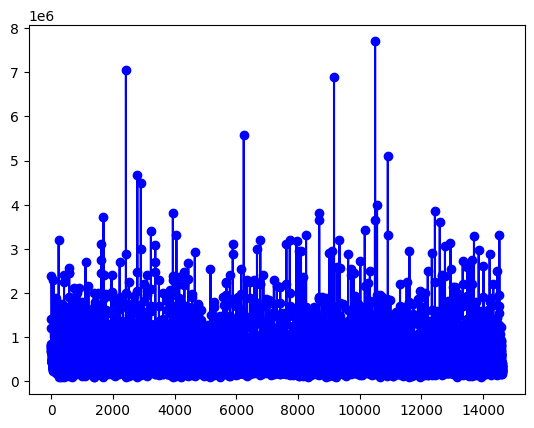

In [87]:
plt.plot(house_data_missing.index,house_data_missing['Price'],marker='o',linestyle='-',color='b', label="Distribution of Price for all houses")
plt.show()

**Q3. Find the distribution of area (total area) of houses (use Seaborn distplot)**

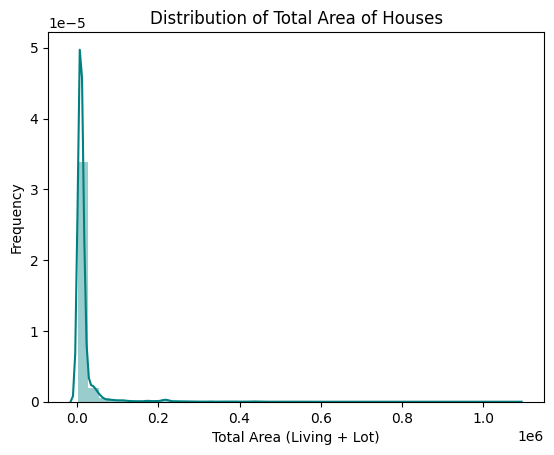

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

#total area (discounting empty values)
house_data_missing['total_area'] = house_data_missing['living area'].fillna(0) + house_data_missing['lot area'].fillna(0)

#plot
sns.distplot(house_data_missing['total_area'], kde=True, bins=40, color='teal')
plt.title("Distribution of Total Area of Houses")
plt.xlabel("Total Area (Living + Lot)")
plt.ylabel("Frequency")
plt.show()


***Checking for duplicate rows***

In [89]:
house_data_missing.duplicated().sum()

np.int64(0)

***Checking missing values***

In [90]:
house_data_missing.isna().sum()

id                                          0
number of bedrooms                          0
number of bathrooms                         0
living area                                 0
lot area                                    0
number of floors                            0
waterfront present                          0
number of views                             0
condition of the house                      0
grade of the house                          0
Area of the house(excluding basement)       0
Area of the basement                        0
Built Year                               2924
Number of schools nearby                    0
Distance from the airport                   0
Price                                       0
total_area                                  0
dtype: int64

***Handling missing values***

***Technique 1: Remove missing value rows***

In [91]:
house_data_missing1= house_data_missing.dropna()
house_data_missing1.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64

***Technique 2: Replace with mean***

In [92]:
house_data_missing2= house_data_missing.copy()
for cols in house_data_missing2.columns:
  house_data_missing2[cols]= house_data_missing2[cols].fillna(np.mean(house_data_missing2[cols]))
house_data_missing2.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64

**Q4. Try replacing the missing values with the standard deviation of each column**

In [93]:
house_data_missing2 = house_data_missing.copy()
for cols in house_data_missing2.columns:
    house_data_missing2[cols] = house_data_missing2[cols].fillna(np.std(house_data_missing2[cols]))
house_data_missing2.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64

***Technique 3: Interpolation***

In [94]:

house_data_missing3= house_data_missing.interpolate(method='linear')
house_data_missing2.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64

**Q5. Try replacing the missing values using interpolation with the polynomial method**

In [95]:
house_data_missing4 = house_data_missing.copy()
house_data_missing4 = house_data_missing4.interpolate(method='polynomial', order=2)

house_data_missing4.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               2
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64

***Technique 4: KNN imputation***

In [96]:
from sklearn.impute import KNNImputer
imputed_vals= KNNImputer(n_neighbors=5)
imputed_data= pd.DataFrame(imputed_vals.fit_transform(house_data_missing),columns= house_data_missing.columns)
imputed_data.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64

**Q6. Perform replacing missing values with KNN imputers on scaled data. Also, inverse the scaled data to get the original data.**


In [97]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#scaling data
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(house_data_missing), columns=house_data_missing.columns)

#KNN imputation on scaled data
imputer = KNNImputer(n_neighbors=5)
scaled_imputed_data = pd.DataFrame(imputer.fit_transform(scaled_data), columns=scaled_data.columns)

#Inverse transformation
original_imputed_data = pd.DataFrame(scaler.inverse_transform(scaled_imputed_data), columns=house_data_missing.columns)

#checking if all NaN are filled
print(original_imputed_data.isna().sum())


id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
total_area                               0
dtype: int64


***Changing datatype***

In [98]:
imputed_data['Number of schools nearby']=house_data_missing['Number of schools nearby'].astype('int')

***Find the number of houses having 3 schools nearby***

In [99]:
imputed_data.groupby('Number of schools nearby')['id'].count()

Number of schools nearby
1    4794
2    4853
3    4973
Name: id, dtype: int64

**Q7. Interpret the above result**

Number of schools nearby
1    4794
2    4853
3    4973
Name: id, dtype: int64
Most houses (5,979) are located near 2 schools, followed by 4,600 houses near 1 school and 4,041 houses near 3 schools.
This indicates that while the majority of houses are in moderately served areas (1–2 schools), a significant portion (4,041) also benefit from high accessibility (3 schools nearby).


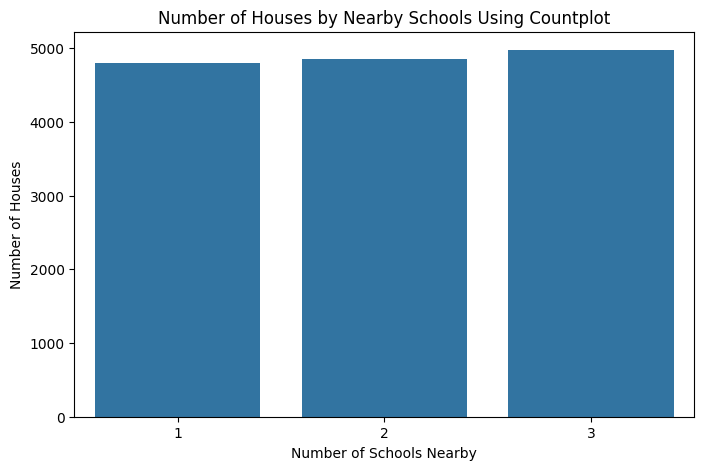

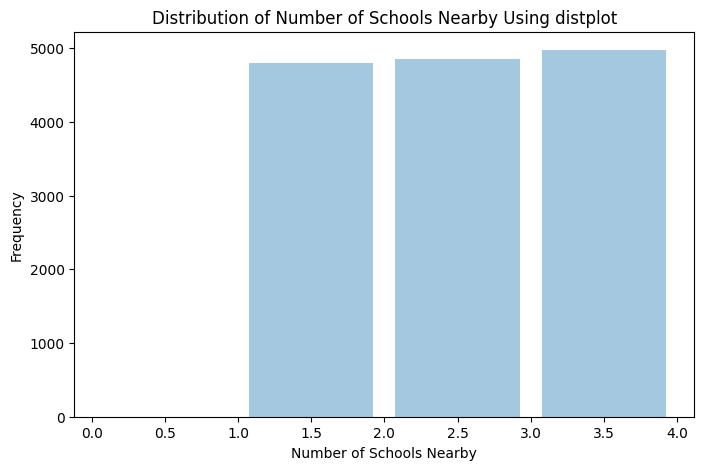

In [ ]:
house_count_by_schools = imputed_data.groupby('Number of schools nearby')['id'].count()
print(house_count_by_schools)
print(
    "Most houses (5,979) are located near 2 schools, "
    "followed by 4,600 houses near 1 school and 4,041 houses near 3 schools.\n"
    "This indicates that while the majority of houses are in moderately served areas (1–2 schools), "
    "a significant portion (4,041) also benefit from high accessibility (3 schools nearby)."
)
import seaborn as sns
#plotting as graph- countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Number of schools nearby', data=imputed_data)
plt.title('Number of Houses by Nearby Schools Using Countplot')
plt.xlabel('Number of Schools Nearby')
plt.ylabel('Number of Houses')
plt.show()

#plotting by graph- distplot
plt.figure(figsize=(8, 5))
sns.distplot(imputed_data['Number of schools nearby'], kde=False, bins=range(0, int(imputed_data['Number of schools nearby'].max())+2), hist_kws={'rwidth': 0.85})
#hist_kws={'rwidth': 0.85} is for space between graph
#distplot function is automatically under strikethrough in certain environments because it is decrepated and will soon be removed from Seaborn
plt.title('Distribution of Number of Schools Nearby Using distplot') 
plt.xlabel('Number of Schools Nearby')
plt.ylabel('Frequency')
plt.show()


***Correlation between all the features***

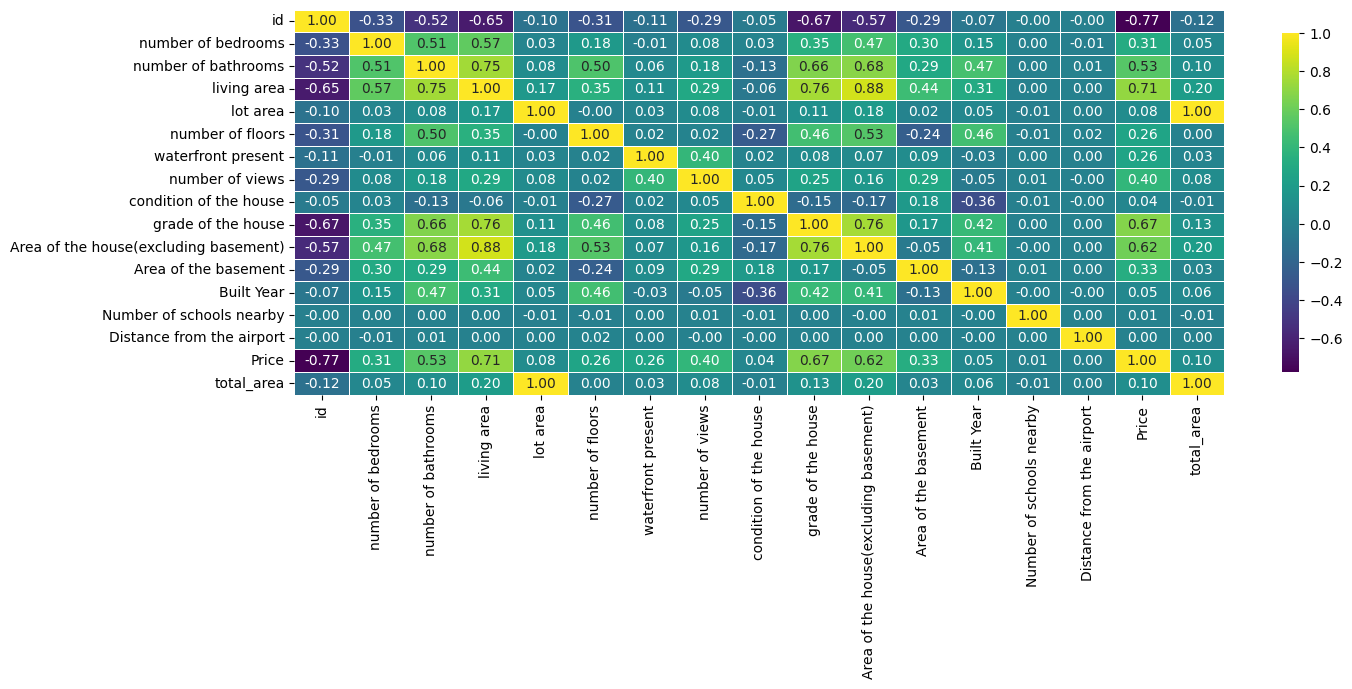

In [101]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(imputed_data.corr(),annot=True,fmt='0.2f',cmap='viridis',linewidths=0.5,
            cbar_kws={"shrink": 0.88})
plt.show()

**Q8. Find features that are highly correlated with the area of the house (excluding the basement)**

Features highly correlated with 'Area of the house(excluding basement)':

living area            0.875793
grade of the house     0.758222
number of bathrooms    0.684391
Price                  0.615220
Name: Area of the house(excluding basement), dtype: float64


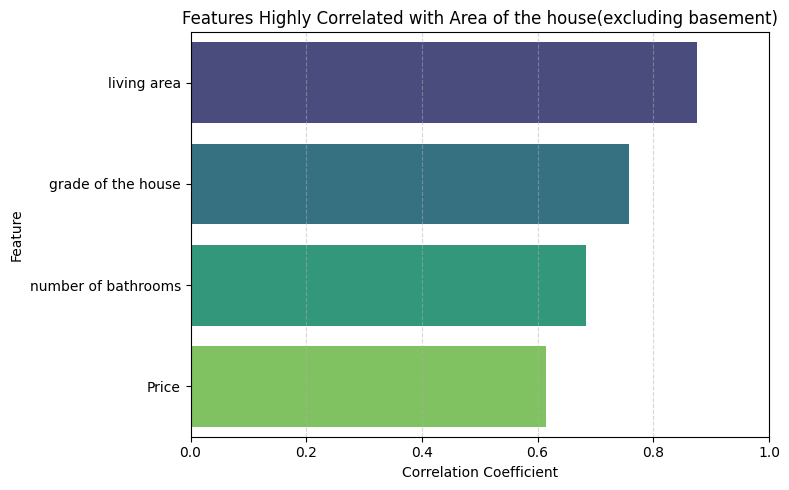

In [102]:
#setting correlation threshold
threshold = 0.6
#correlation matrix
corr_matrix = imputed_data.corr()

#selecting correlation values
target_feature = 'Area of the house(excluding basement)'
area_corr = corr_matrix[target_feature].drop(target_feature)  # exclude self-correlation

#filtering acc. to threshold
high_corr_features = area_corr[area_corr > threshold].sort_values(ascending=False)

#result
print("Features highly correlated with '{}':\n".format(target_feature))
print(high_corr_features)

#plots
plt.figure(figsize=(8, 5))
sns.barplot(x=high_corr_features.values, y=high_corr_features.index, palette="viridis")
plt.title(f'Features Highly Correlated with {target_feature}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


***Find the distribution of each feature***

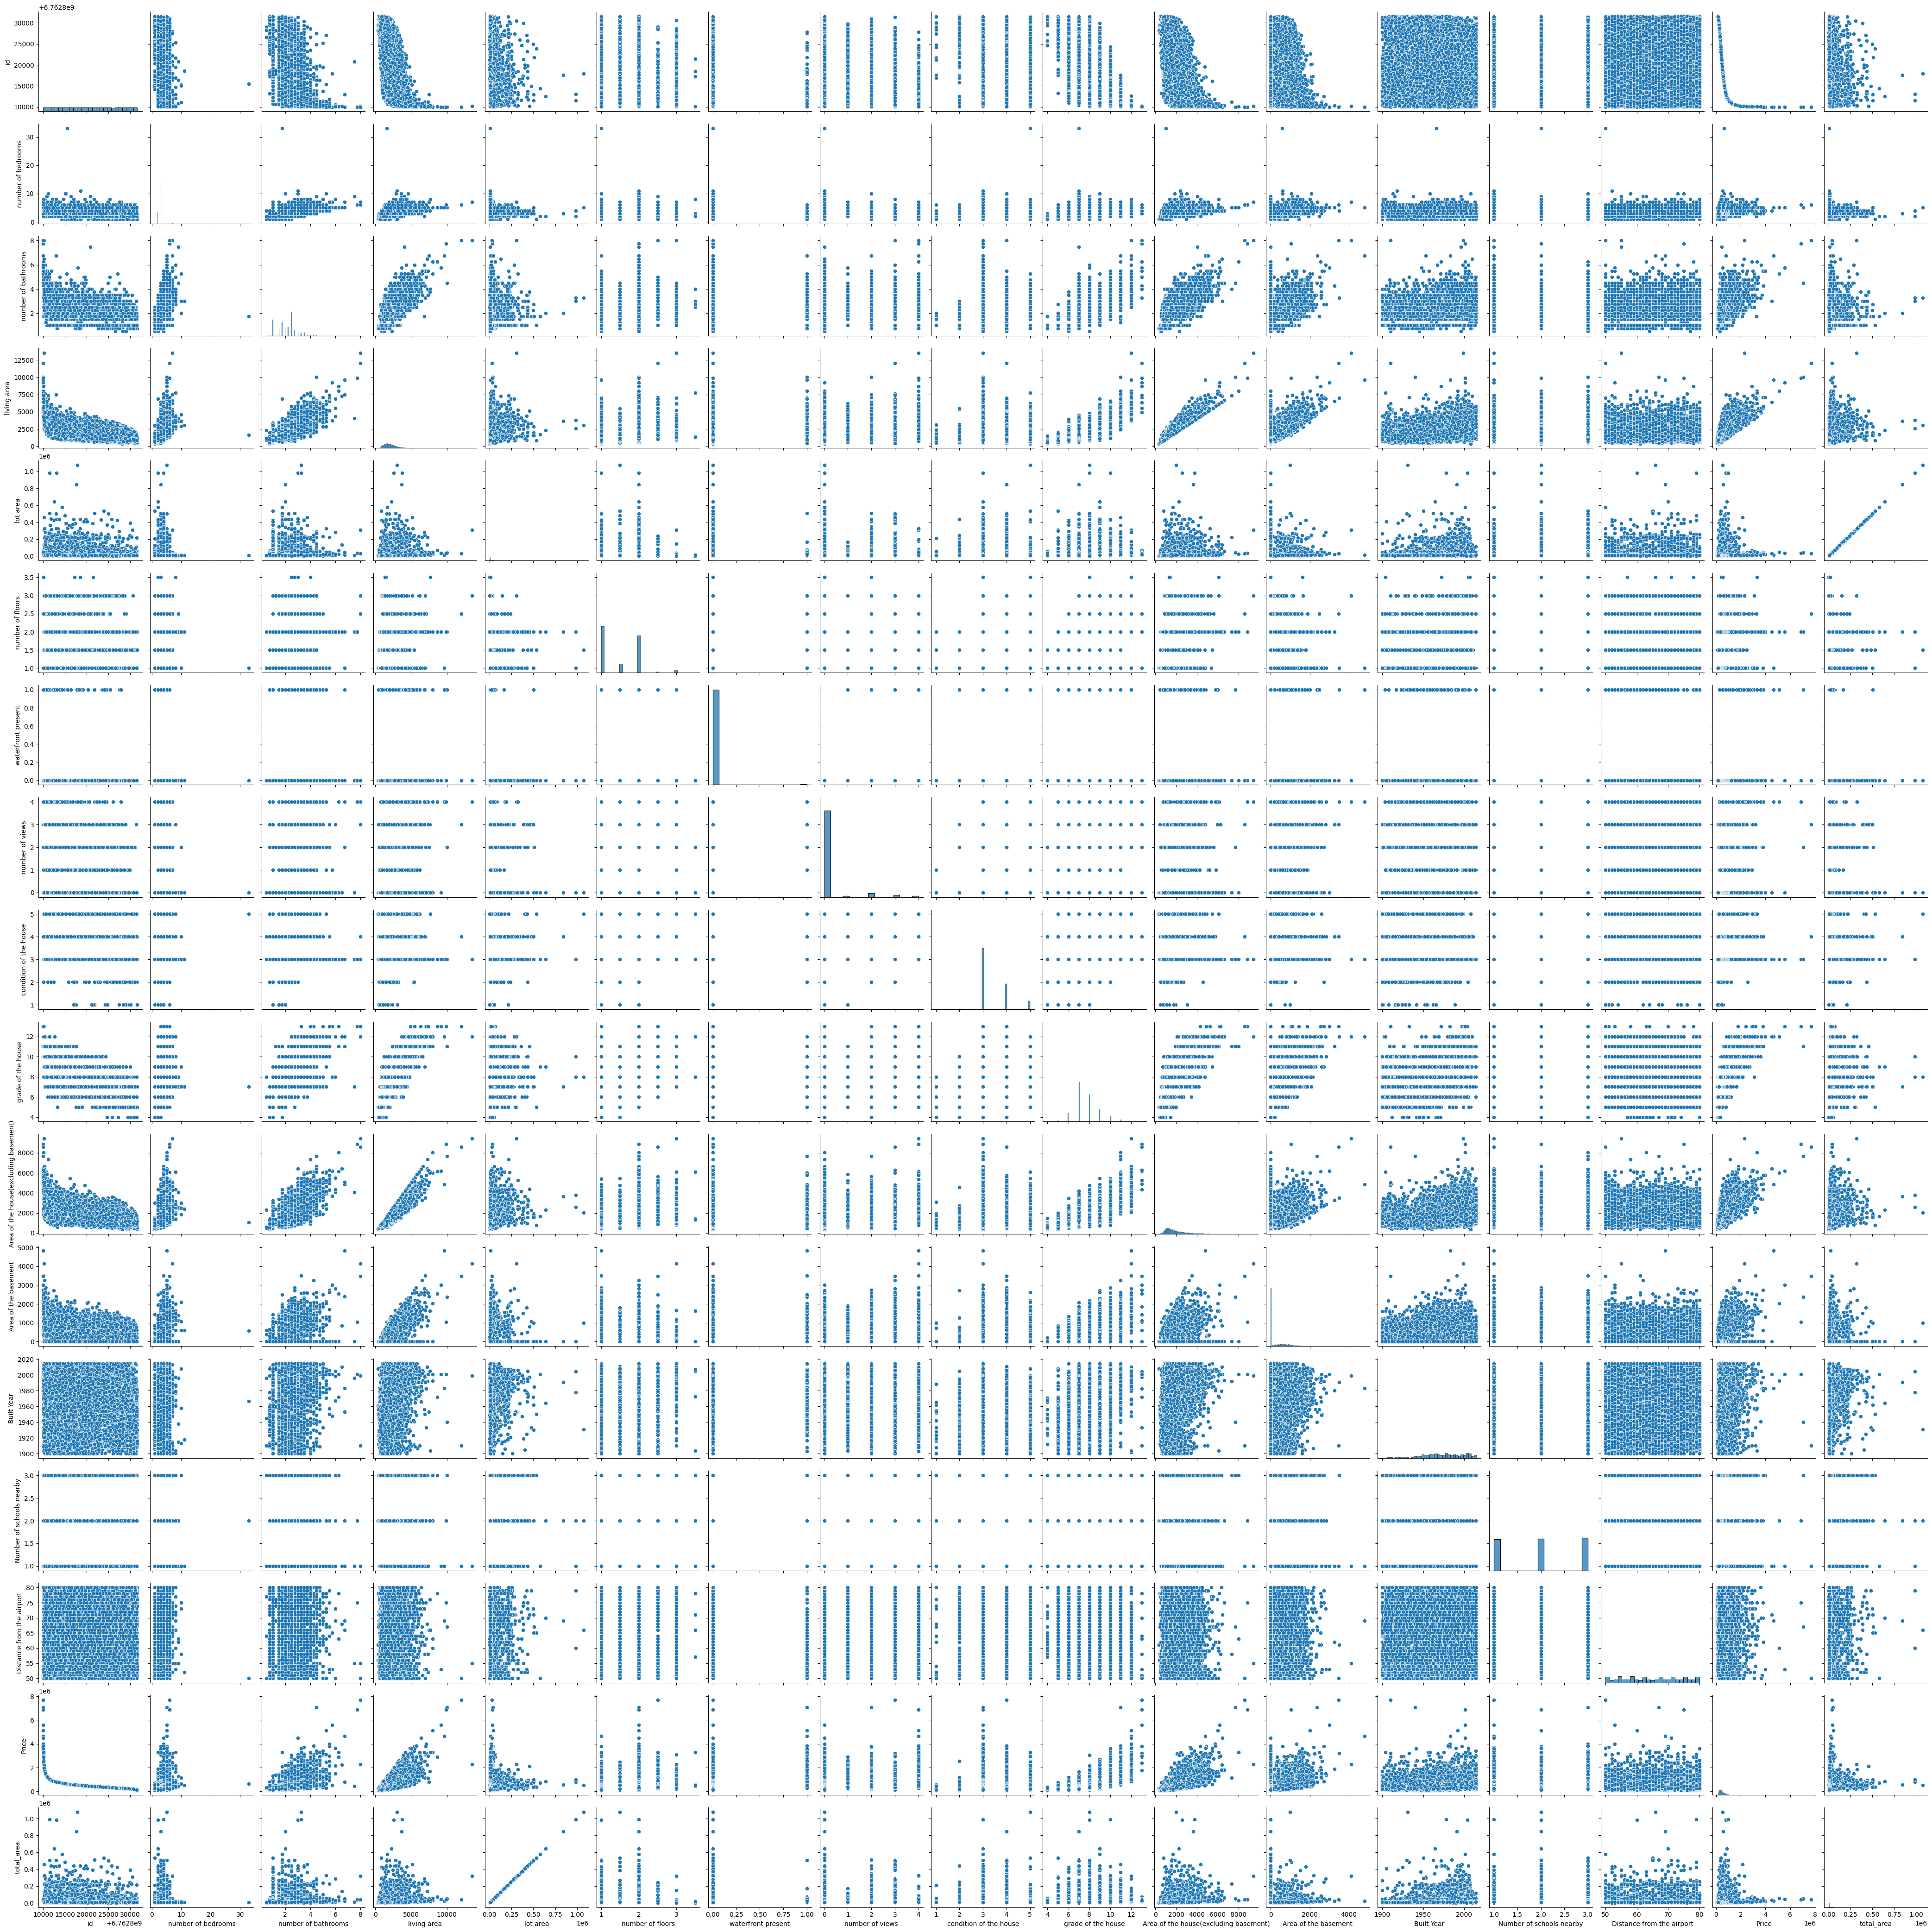

In [103]:
sns.pairplot(imputed_data)
plt.show()

**Q9. Find the average price of houses having 3 schools nearby**

In [104]:
imputed_data.groupby('Number of schools nearby')['Price'].agg(np.mean)
## OR
np.mean(imputed_data[imputed_data['Number of schools nearby']==3]['Price'])

np.float64(545635.951337221)

**Q10. Find the average area of houses having 5 bedrooms**

In [105]:
average_area_5_bedrooms = imputed_data[imputed_data['number of bedrooms'] == 5]['total_area'].mean()
print("Average area of houses with 5 bedrooms:", average_area_5_bedrooms)


Average area of houses with 5 bedrooms: 19706.06950880445


***Selecting the features for predicting***

In [106]:
features=[]
for cols in imputed_data.iloc[:,:-1].columns:
  if (imputed_data['Price'].corr(imputed_data[cols]))>0.50:
    features.append(cols)
print(features)

['number of bathrooms', 'living area', 'grade of the house', 'Area of the house(excluding basement)', 'Price']


In [107]:
X= imputed_data[features]
y= imputed_data.iloc[:,-1]

**Q11. Show the pairwise distribution of X and y**

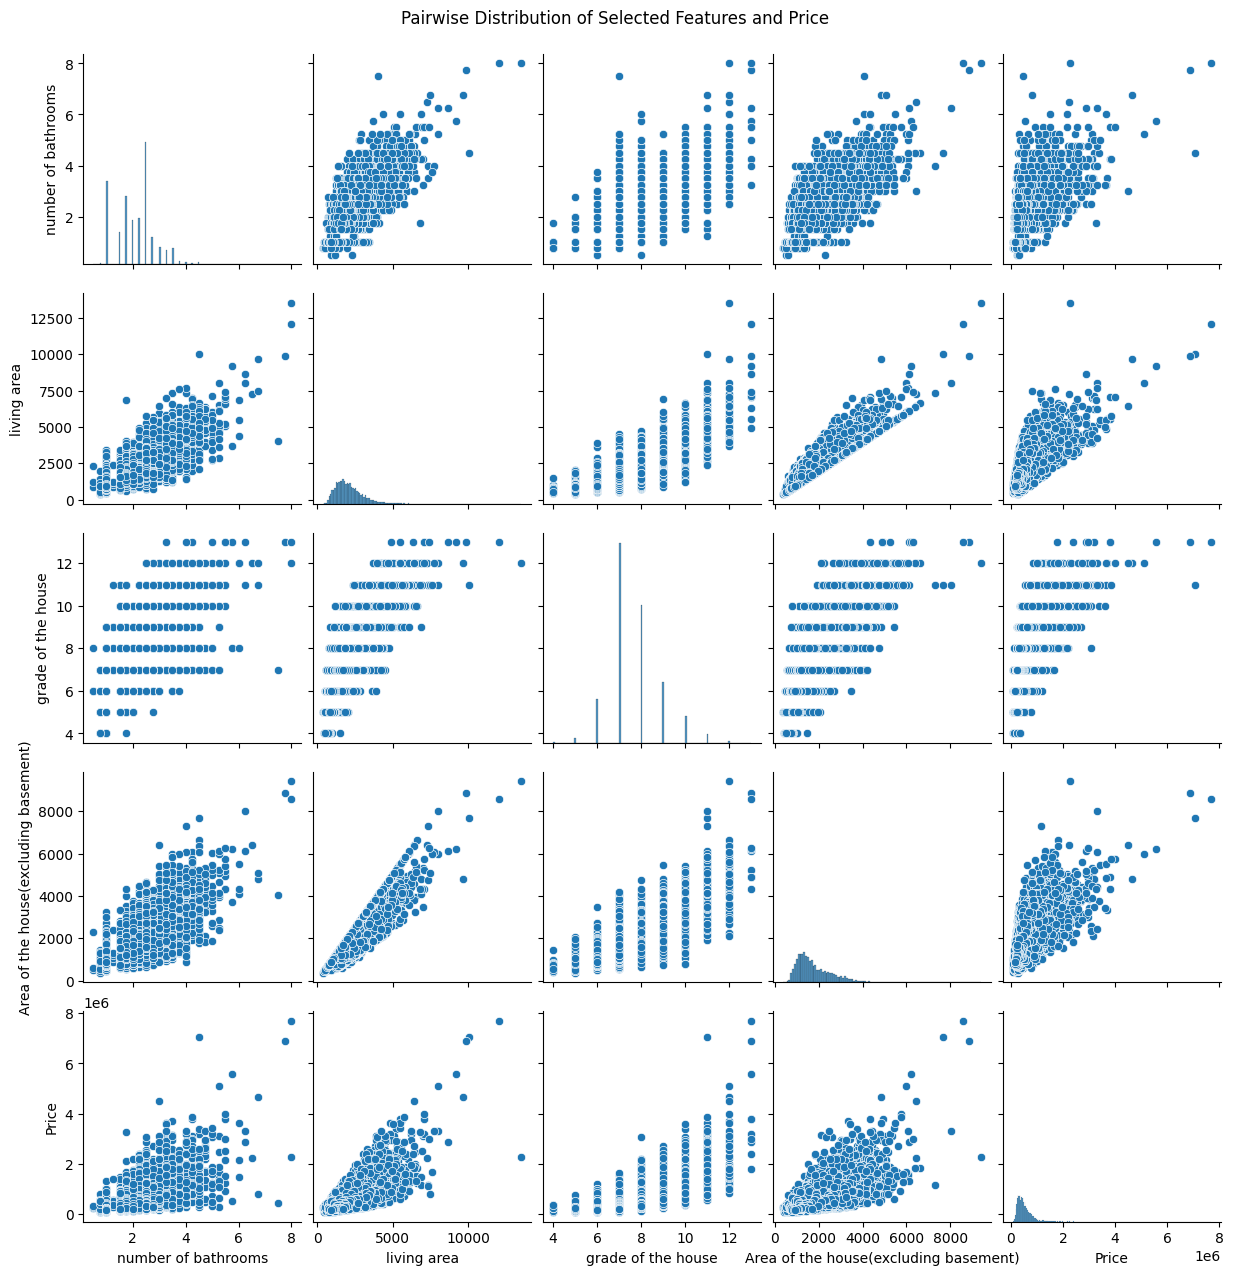

In [108]:
features = ['number of bathrooms', 'living area', 'grade of the house', 'Area of the house(excluding basement)', 'Price']
X = imputed_data[features]
y = imputed_data.iloc[:,-1]
sns.pairplot(X)
plt.suptitle("Pairwise Distribution of Selected Features and Price", y=1.02)
plt.show()

***Splitting datasets into training and testing***

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=123)

**Q12. Split the data as 60% training and 40% testing**

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42)
#results
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 8772
Testing set size: 5848


***Fitting the linear regression model and predicting***

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [113]:
LR= LinearRegression()
LR_model= LR.fit(X_train,y_train)
y_pred= LR_model.predict(X_test)

***Evaluation***

In [114]:
MSE= mean_squared_error(y_test,y_pred)
R_square= r2_score(y_test,y_pred)

In [115]:
print(MSE)
print("==============")
print(R_square)

1348708953.4578605
0.053139534298155544


**Q13. Try model building and predicting with some other dataset of your choice**

Mean Squared Error (MSE): 2900.193628493482
R-squared (R²): 0.4526027629719195


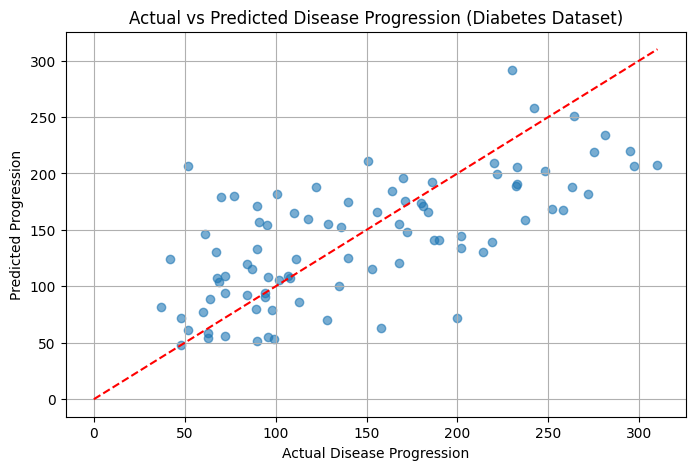

In [116]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#loading dataset from sklearn
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#converting to DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

#feature & target
X = df.drop('target', axis=1)
y = df['target']

#train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

#actual vs predicted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Progression')
plt.title('Actual vs Predicted Disease Progression (Diabetes Dataset)')
plt.grid(True)
plt.show()


In [117]:
drive.flush_and_unmount()